In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline 

In [2]:
confirmed_df=pd.read_csv('time_series_covid19_confirmed_global.csv',)
deaths_df=pd.read_csv('time_series_covid19_deaths_global.csv')
recoveries_df=pd.read_csv('time_series_covid19_recovered_global.csv')

### BASIC CHECK

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [4]:
confirmed_df['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Yukon', 'Anhui', 'Beijing', 'Chongqing', 'Fujian',
       'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Martinique', 'Mayotte',
       'New Caledonia', 'Reunion', 'Sai

In [5]:
confirmed_df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [6]:
confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB


In [7]:
confirmed_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,1.081163e+05,1.090052e+05,1.100551e+05,1.111201e+05,1.122630e+05,1.134410e+05,1.146599e+05,1.157171e+05,1.166240e+05,1.174654e+05
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,5.678329e+05,5.727452e+05,5.774877e+05,5.831820e+05,5.891235e+05,5.953081e+05,6.017349e+05,6.076737e+05,6.126599e+05,6.154886e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.672500e+02,4.675000e+02,4.675000e+02,4.682500e+02,4.682500e+02,4.707500e+02,4.707500e+02,4.707500e+02,4.707500e+02,4.710000e+02
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.354500e+03,3.381000e+03,3.397000e+03,3.459000e+03,3.466000e+03,3.522500e+03,3.608000e+03,3.714500e+03,3.772000e+03,3.823500e+03
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.472475e+04,3.540750e+04,3.553900e+04,3.580200e+04,3.599400e+04,3.639525e+04,3.670825e+04,3.731275e+04,3.781650e+04,3.826325e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,6.485123e+06,6.520122e+06,6.553652e+06,6.592342e+06,6.630051e+06,6.674411e+06,6.723933e+06,6.768119e+06,6.804814e+06,6.856884e+06


In [8]:
#Extracting all colunmns name .keys() function
cols = confirmed_df.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=248)

In [9]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recovered = recoveries_df.loc[:, cols[4]:cols[-1]]

In [10]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,0,0,0,0,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,0,0,0,0,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,0,0,0,0,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,0,0,0,0,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,0,0,0,0,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [11]:
confirmed.keys()

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=244)

In [12]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    mortality_rate.append(death_sum/confirmed_sum)

In [13]:
len(total_deaths)

244

In [14]:
death_sum

963693

In [15]:
confirmed_sum

31245797

In [16]:
recovered_sum

21394593

In [17]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9926,
 12038,
 16787,
 19887,
 23898,
 27643,
 30802,
 34395,
 37129,
 40159,
 42768,
 44810,
 45228,
 60381,
 66908,
 69050,
 71234,
 73269,
 75151,
 75651,
 76211,
 76840,
 78601,
 78981,
 79545,
 80398,
 81375,
 82735,
 84120,
 86013,
 88395,
 90372,
 92957,
 95272,
 98028,
 102018,
 106036,
 109993,
 113946,
 118967,
 126675,
 132450,
 146783,
 157801,
 169032,
 183677,
 199391,
 218683,
 245633,
 275963,
 307709,
 341784,
 384630,
 425787,
 476680,
 539069,
 603910,
 671653,
 731267,
 795997,
 872495,
 948663,
 1030010,
 1113203,
 1193711,
 1265377,
 1338067,
 1415186,
 1498895,
 1585483,
 1672988,
 1749872,
 1846819,
 1916464,
 1986284,
 2067245,
 2163941,
 2251672,
 2325485,
 2406054,
 2479522,
 2554727,
 2631781,
 2720583,
 2807495,
 2892296,
 2965076,
 3034072,
 3109425,
 3186589,
 3270117,
 3357276,
 3438689,
 3516333,
 3592506,
 3672660,
 3762727,
 3851894,
 3943470,
 4029169,
 4105292,
 4181640,
 4265367,
 4350206

In [18]:
day_since_1_22=np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases= np.array(world_cases).reshape(-1,1)
total_deaths= np.array(total_deaths).reshape(-1,1)
total_recovered= np.array(total_recovered).reshape(-1,1)

In [19]:
day_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [20]:
total_recovered

array([[      28],
       [      30],
       [      36],
       [      39],
       [      52],
       [      61],
       [     107],
       [     126],
       [     143],
       [     222],
       [     284],
       [     472],
       [     623],
       [     852],
       [    1124],
       [    1487],
       [    2011],
       [    2616],
       [    3244],
       [    3946],
       [    4683],
       [    5150],
       [    6295],
       [    8058],
       [    9395],
       [   10865],
       [   12583],
       [   14352],
       [   16121],
       [   18177],
       [   18890],
       [   22886],
       [   23394],
       [   25227],
       [   27905],
       [   30384],
       [   33277],
       [   36711],
       [   39782],
       [   42716],
       [   45602],
       [   48228],
       [   51170],
       [   53796],
       [   55865],
       [   58359],
       [   60694],
       [   62493],
       [   64404],
       [   67002],
       [   68324],
       [   70251],
       [   7

### confirmed data

In [21]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,0,0,0,0,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,0,0,0,0,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,0,0,0,0,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,0,0,0,0,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,0,0,0,0,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [22]:
world_cases

array([[     555],
       [     654],
       [     941],
       [    1434],
       [    2118],
       [    2927],
       [    5578],
       [    6166],
       [    8234],
       [    9926],
       [   12038],
       [   16787],
       [   19887],
       [   23898],
       [   27643],
       [   30802],
       [   34395],
       [   37129],
       [   40159],
       [   42768],
       [   44810],
       [   45228],
       [   60381],
       [   66908],
       [   69050],
       [   71234],
       [   73269],
       [   75151],
       [   75651],
       [   76211],
       [   76840],
       [   78601],
       [   78981],
       [   79545],
       [   80398],
       [   81375],
       [   82735],
       [   84120],
       [   86013],
       [   88395],
       [   90372],
       [   92957],
       [   95272],
       [   98028],
       [  102018],
       [  106036],
       [  109993],
       [  113946],
       [  118967],
       [  126675],
       [  132450],
       [  146783],
       [  15

In [25]:
total_confirm1=pd.DataFrame(world_cases,index=dates)
total_confirm1.rename(columns={0:"confirm"},inplace=True)
total_confirm1

,confirm
1/22/20,555
1/23/20,654
1/24/20,941
1/25/20,1434
1/26/20,2118
...,...
9/17/20,30175313
9/18/20,30499534
9/19/20,30780755
9/20/20,31021972


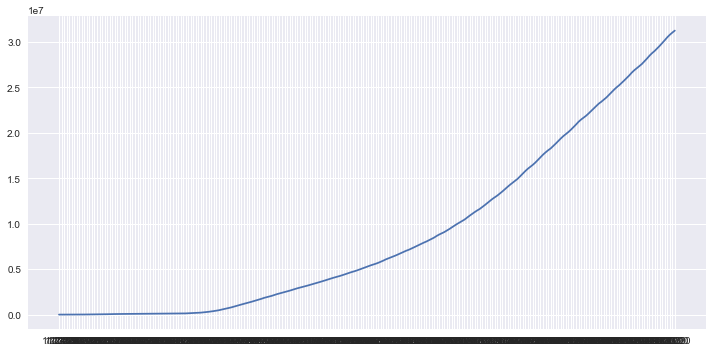

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5),facecolor='white')#canvas  size
plt.plot(total_confirm1)#line plot 
plt.tight_layout()

In [27]:
## Plotting the autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

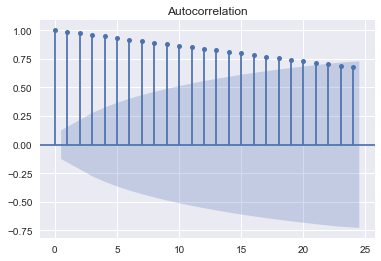

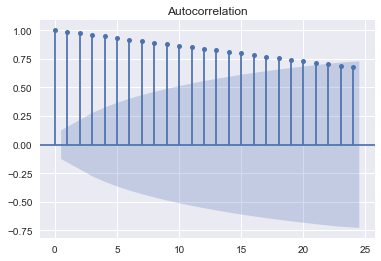

In [28]:
plot_acf(total_confirm1)
## from the autocorrelation plot it is clear that given series is not stationary

In [29]:
## making it stationary by taking difference of 1
total_confirm2=total_confirm1.diff(periods=1)#This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply, 
#pandas diff will subtract 1 cell value from another cell value within the same index.
total_confirm2

,confirm
1/22/20,NaN
1/23/20,99.0
1/24/20,287.0
1/25/20,493.0
1/26/20,684.0
...,...
9/17/20,313364.0
9/18/20,324221.0
9/19/20,281221.0
9/20/20,241217.0


In [30]:
total_confirm2=total_confirm2.iloc[1:]#columns from 1 one to end 
total_confirm2

,confirm
1/23/20,99.0
1/24/20,287.0
1/25/20,493.0
1/26/20,684.0
1/27/20,809.0
...,...
9/17/20,313364.0
9/18/20,324221.0
9/19/20,281221.0
9/20/20,241217.0


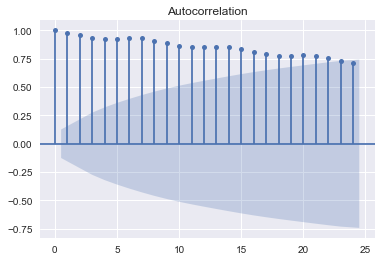

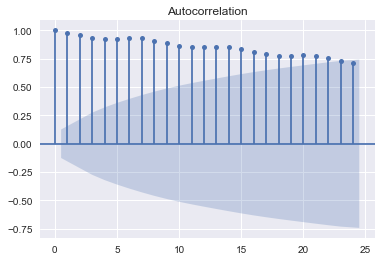

In [31]:
plot_acf(total_confirm2)#A plot of the autocorrelation of a time series by lag and still the series has not become stationary

In [32]:
total_confirm3=total_confirm2.diff(periods=1)
total_confirm3

,confirm
1/23/20,NaN
1/24/20,188.0
1/25/20,206.0
1/26/20,191.0
1/27/20,125.0
...,...
9/17/20,9357.0
9/18/20,10857.0
9/19/20,-43000.0
9/20/20,-40004.0


In [33]:
total_confirm3=total_confirm3.iloc[1:]
total_confirm3

,confirm
1/24/20,188.0
1/25/20,206.0
1/26/20,191.0
1/27/20,125.0
1/28/20,1842.0
...,...
9/17/20,9357.0
9/18/20,10857.0
9/19/20,-43000.0
9/20/20,-40004.0


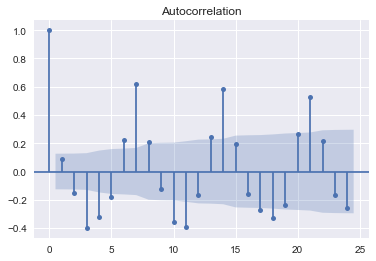

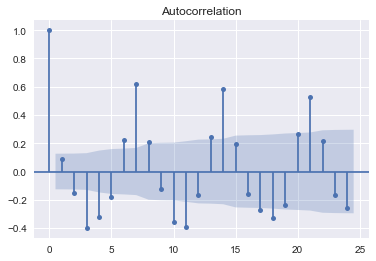

In [53]:
plot_acf(total_confirm3)

### deaths data

In [34]:
total_deaths1=pd.DataFrame(total_deaths,index=dates)
total_deaths1.rename(columns={0:"Deaths"},inplace=True)
total_deaths1

,Deaths
1/22/20,17
1/23/20,18
1/24/20,26
1/25/20,42
1/26/20,56
...,...
9/17/20,946061
9/18/20,951767
9/19/20,956999
9/20/20,960695


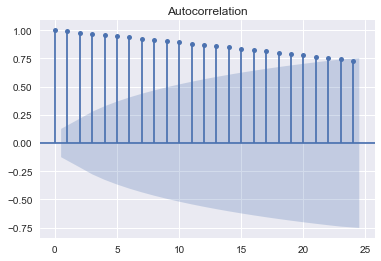

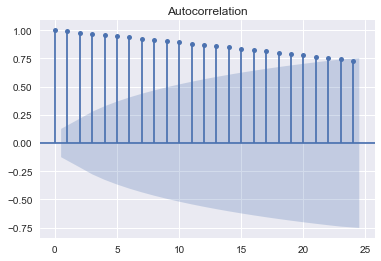

In [35]:
plot_acf(total_deaths1)

In [36]:
total_deaths2=total_deaths1.diff(periods=1)

In [37]:
total_deaths2

,Deaths
1/22/20,NaN
1/23/20,1.0
1/24/20,8.0
1/25/20,16.0
1/26/20,14.0
...,...
9/17/20,5456.0
9/18/20,5706.0
9/19/20,5232.0
9/20/20,3696.0


In [38]:
total_deaths2=total_deaths2.iloc[1:]
total_deaths2

,Deaths
1/23/20,1.0
1/24/20,8.0
1/25/20,16.0
1/26/20,14.0
1/27/20,26.0
...,...
9/17/20,5456.0
9/18/20,5706.0
9/19/20,5232.0
9/20/20,3696.0


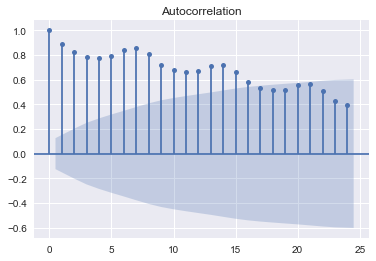

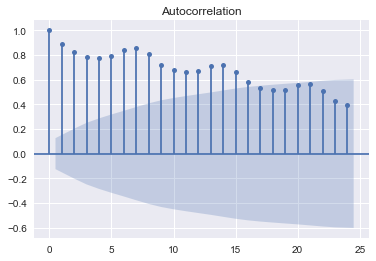

In [39]:
plot_acf(total_deaths2)

In [40]:
total_deaths3=total_deaths2.diff(periods=1)

In [41]:
total_deaths3=total_deaths3.iloc[1:]
total_deaths3

,Deaths
1/24/20,7.0
1/25/20,8.0
1/26/20,-2.0
1/27/20,12.0
1/28/20,23.0
...,...
9/17/20,-297.0
9/18/20,250.0
9/19/20,-474.0
9/20/20,-1536.0


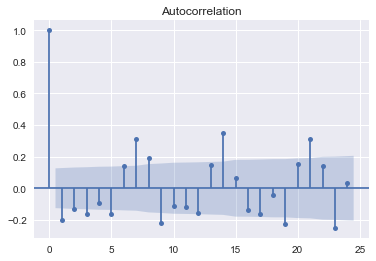

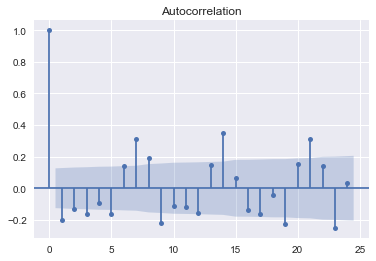

In [42]:
plot_acf(total_deaths3)

In [43]:
total_deaths3.shape#shape of the data rows and columns

(242, 1)

###  recovered data 

In [44]:
recovered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,0,0,0,0,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,0,0,0,0,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,0,0,0,0,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,0,0,0,0,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,0,0,0,0,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


In [45]:
total_recovered

array([[      28],
       [      30],
       [      36],
       [      39],
       [      52],
       [      61],
       [     107],
       [     126],
       [     143],
       [     222],
       [     284],
       [     472],
       [     623],
       [     852],
       [    1124],
       [    1487],
       [    2011],
       [    2616],
       [    3244],
       [    3946],
       [    4683],
       [    5150],
       [    6295],
       [    8058],
       [    9395],
       [   10865],
       [   12583],
       [   14352],
       [   16121],
       [   18177],
       [   18890],
       [   22886],
       [   23394],
       [   25227],
       [   27905],
       [   30384],
       [   33277],
       [   36711],
       [   39782],
       [   42716],
       [   45602],
       [   48228],
       [   51170],
       [   53796],
       [   55865],
       [   58359],
       [   60694],
       [   62493],
       [   64404],
       [   67002],
       [   68324],
       [   70251],
       [   7

In [46]:
total_recovered1=pd.DataFrame(total_recovered,index=dates)
total_recovered1.rename(columns={0:"recover"},inplace=True)
total_recovered1

,recover
1/22/20,28
1/23/20,30
1/24/20,36
1/25/20,39
1/26/20,52
...,...
9/17/20,20527185
9/18/20,20778990
9/19/20,21016801
9/20/20,21252815


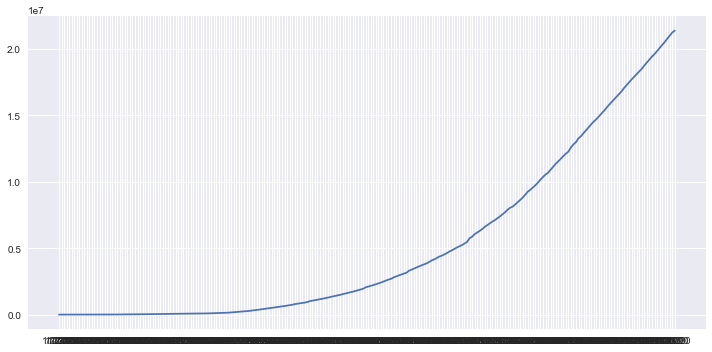

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5),facecolor='white')#canvas  size
plt.plot(total_recovered1)#line plot 
plt.tight_layout()

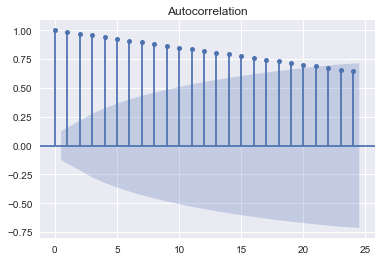

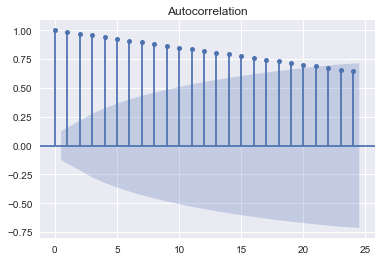

In [48]:
plot_acf(total_recovered1)

In [49]:
total_recovered2=total_recovered1.diff(periods=1)

In [50]:
total_recovered2

,recover
1/22/20,NaN
1/23/20,2.0
1/24/20,6.0
1/25/20,3.0
1/26/20,13.0
...,...
9/17/20,219247.0
9/18/20,251805.0
9/19/20,237811.0
9/20/20,236014.0


In [51]:
total_recovered2=total_recovered2.iloc[1:]
total_recovered2

,recover
1/23/20,2.0
1/24/20,6.0
1/25/20,3.0
1/26/20,13.0
1/27/20,9.0
...,...
9/17/20,219247.0
9/18/20,251805.0
9/19/20,237811.0
9/20/20,236014.0


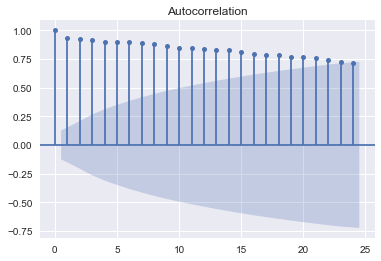

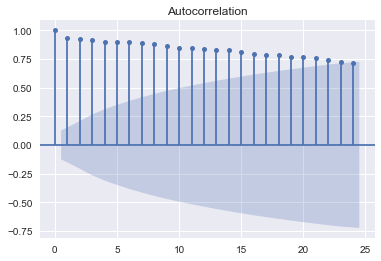

In [52]:
plot_acf(total_recovered2)

In [53]:
total_recovered3=total_recovered2.diff(periods=1)
total_recovered3

,recover
1/23/20,NaN
1/24/20,4.0
1/25/20,-3.0
1/26/20,10.0
1/27/20,-4.0
...,...
9/17/20,-9712.0
9/18/20,32558.0
9/19/20,-13994.0
9/20/20,-1797.0


In [54]:
total_recovered3=total_recovered3.iloc[1:]
total_recovered3

,recover
1/24/20,4.0
1/25/20,-3.0
1/26/20,10.0
1/27/20,-4.0
1/28/20,37.0
...,...
9/17/20,-9712.0
9/18/20,32558.0
9/19/20,-13994.0
9/20/20,-1797.0


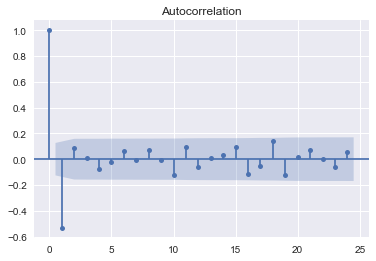

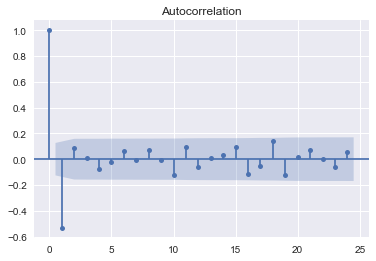

In [55]:
plot_acf(total_recovered3)

In [56]:
total_recovered3.shape

(242, 1)

### MODEL CREATION

In [57]:
## Creating training and test sets
train=total_confirm3[:180]#from 0th rows to 100th rows traning data
test=total_confirm3[180:]#from 100th rows to end testing data

In [58]:
## importing the library
from statsmodels.tsa.arima_model import ARIMA

In [59]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))# is used to find the cartesian product from the given iterator,
# output is lexicographic ordered.
pdq#number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [60]:

##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
for params in pdq:#iterating params over pdq
    try:
        model_arima_1 = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit_1 = model_arima_1.fit()#training
        print(params, model_arima_fit_1.aic)#printing parameter and aic values
    except:
        continue
#take lowest aic score     

C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

(0, 0, 0) 3870.6312021460913


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(0, 0, 1) 3872.5095479802058
(0, 0, 2) 3845.1973569494726


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(0, 0, 3) 3844.3856372877444


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(0, 0, 4) 3826.7542229000383
(0, 1, 0) 3974.668829037126


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(0, 1, 1) 3856.705898387954


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(0, 1, 2) 3858.6256961456215


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(0, 1, 3) 3823.4946670434074


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(0, 1, 4) 3821.198309525669
(0, 2, 0) 4131.783647163826


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(0, 2, 1) 3960.6284838705483


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\tsatools.py:726: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\scipy\optimize\_numdiff.py:47

(0, 2, 2) nan


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(0, 2, 3) 3857.5201671338914


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(0, 2, 4) 3822.0082166386
(1, 0, 0) 3872.571393393678


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(1, 0, 3) 3826.091405785845


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(1, 0, 4) 3812.98458461604


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(1, 1, 0) 3948.676306263279


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anacon

(1, 1, 3) 3823.1032083710384


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(1, 1, 4) 3822.797583988472
(1, 2, 0) 4056.8251327830017


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anacon

(2, 0, 0) 3863.6136675390594


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(2, 0, 2) 3777.5161079390505


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(2, 0, 3) 3770.1475735892777


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:566: Convergen

(2, 0, 4) 3791.8686693952204
(2, 1, 0) 3930.905033198074


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(2, 1, 2) 3808.9786993856533


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anacon

(2, 2, 0) 4013.7630740386467


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anacon

(3, 0, 0) 3855.9495013188002


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(3, 0, 2) 3772.5344363531553


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(3, 0, 3) 3791.352280303824


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(3, 0, 4) 3790.372002755507
(3, 1, 0) 3923.9780932713506


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(3, 1, 2) 3794.5397108712987


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anac

(3, 1, 3) 3754.502890031135


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(3, 2, 0) 3992.9709597807455


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anacon

(4, 0, 0) 3836.376686372495


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(4, 0, 1) 3818.7118287561293


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(4, 0, 2) 3778.1399275494673


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(4, 0, 3) 3779.440515129115
(4, 1, 0) 3916.118754409428


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(4, 1, 2) 3770.0132233341815


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anacon

(4, 2, 0) 3989.367102659047


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(4, 2, 2) 3824.305168964316


C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nikita Singh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [84]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(3, 1,3))

model_arima_fit = model_arima.fit()#training

C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [85]:
print(model_arima_fit.aic)#aic score

3754.5028929260097


In [104]:
forecast = model_arima_fit.forecast(steps=5)[0]
forecast

array([ 20130.5488365 ,  13125.16586396,  -4518.91862577, -15095.92479738,
       -12627.67286009])

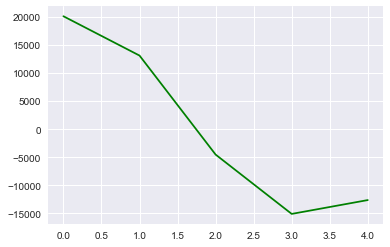

In [105]:
plt.plot(forecast,color='green')#line plot for prediction

# Death Model

In [88]:
## Creating training and test sets
train1=total_deaths3[:180]#from 0th rows to 100th rows traning data
test1=total_deaths3[180:]#from 100th rows to end testing data

In [89]:

##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
for params in pdq:#iterating params over pdq
    try:
        model_arima_11 = ARIMA(train1, order=params)#training model on various pdq values
        model_arima_fit_11 = model_arima_11.fit()#training
        print(params, model_arima_fit_11.aic)#printing parameter and aic values
    except:
        continue
#take lowest aic score        

C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

(0, 0, 0) 2940.962767999674
(0, 0, 1) 2941.841950180172


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(0, 0, 2) 2915.597226796232
(0, 0, 3) 2916.654791646096


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(0, 0, 4) 2906.867834854429
(0, 1, 0) 3056.1100180087724
(0, 1, 1) 2932.827938990851


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

(0, 1, 2) 2933.9526362817533
(0, 1, 3) 2893.957874041301


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(0, 1, 4) 2893.336238348581
(0, 2, 0) 3222.04838254081
(0, 2, 1) 3047.2011054713057


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

(0, 2, 2) nan
(0, 2, 3) 2939.982680317509


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency info

(0, 2, 4) nan
(1, 0, 0) 2942.4726038623926
(1, 0, 1) 2924.5336806220535
(1, 0, 2) 2916.965545629987


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(1, 0, 3) 2896.0601775494943


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(1, 0, 4) 2891.7541818148175
(1, 1, 0) 3027.203419659777


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

(1, 2, 0) 3147.4595785745573


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optim

(1, 2, 4) 2890.4605332728183
(2, 0, 0) 2932.052540794996
(2, 0, 1) 2912.336612974008


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(2, 0, 2) 2857.475455799274


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(2, 0, 3) 2841.206696565723


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(2, 0, 4) 2890.742530035994
(2, 1, 0) 3002.448088890108


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

(2, 1, 2) 2885.4049352438205
(2, 2, 0) 3093.372488434189


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

(3, 0, 0) 2928.741625627671
(3, 0, 1) 2910.7540805336052


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(3, 0, 2) 2850.0476667514254


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(3, 0, 3) 2843.0644013236147


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(3, 0, 4) 2843.4274312816024
(3, 1, 0) 2996.2323186391545


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

(3, 1, 2) 2880.8488002273743


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

(3, 2, 0) 3068.1867171093763


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian fai

(3, 2, 2) 2930.0609845666163
(4, 0, 0) 2913.4845881858823


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(4, 0, 1) 2897.2460230508023


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(4, 0, 2) 2829.200954483029


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(4, 0, 3) 2831.195813005898


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(4, 0, 4) 2809.7573412238785
(4, 1, 0) 2992.227746554892


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

(4, 1, 2) 2857.4598080179894


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

(4, 2, 0) 3064.917374445709


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(4, 2, 2) 2911.5376773030666


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [90]:
## create the final model with lowest aic score parameter
model_arima1 = ARIMA(train1, order=(4, 0,2))

model_arima_fit1 = model_arima1.fit()#training

C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [91]:
print(model_arima_fit1.aic)#aic score

2829.200954483029


In [101]:
forecast_death = model_arima_fit1.forecast(steps=5)[0]

In [102]:
forecast_death

array([ 262.46985175,   30.37750244, -185.97685826, -925.9460432 ,
       -592.98503211])

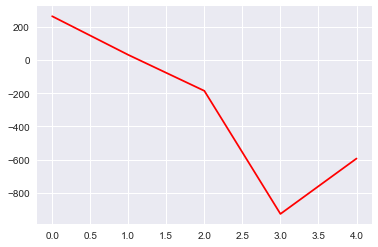

In [103]:
plt.plot(forecast_death,color='red')#line plot for prediction

# Recovered Model

In [106]:
train2=total_recovered3[:180]
test2=total_recovered3[180:]

In [107]:
for params in pdq:#iterating params over pdq
    try:
        model_arima_12= ARIMA(train2, order=params)#training model on various pdq values
        model_arima_fit_12 = model_arima_12.fit()#training
        print(params, model_arima_fit_12.aic)#printing parameter and aic values
    except:
        continue

C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

(0, 0, 0) 4178.716059364142
(0, 0, 1) 4066.1910631383544


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(0, 0, 2) 4065.9541749711157
(0, 0, 3) 4064.6958975308903


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(0, 0, 4) 4065.658532139683
(0, 1, 0) 4365.111354771229
(0, 1, 1) 4163.554037105689


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

(0, 1, 2) 4038.3215426971196


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

(0, 1, 3) 4039.5707121458754
(0, 1, 4) 4036.392769504521
(0, 2, 0) 4565.161235059068
(0, 2, 1) 4348.930773726372


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

(0, 2, 3) nan
(0, 2, 4) 4080.2667607699927
(1, 0, 0) 4099.182238550551


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(1, 0, 1) 4065.3627158626723
(1, 0, 2) 4065.697889989064


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(1, 0, 3) 4066.3653731627446
(1, 1, 0) 4213.054032158148


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

(1, 2, 0) 4367.092657460386


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D

(2, 0, 0) 4089.2068880011543
(2, 0, 1) 4065.1927847348893


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(2, 0, 2) 4067.061779907379


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(2, 0, 3) 4060.770841275578


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(2, 0, 4) 4063.0612943117585
(2, 1, 0) 4163.735755440105


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

(2, 2, 0) 4270.46771930944


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian fai

(2, 2, 4) 4062.688751157823
(3, 0, 0) 4087.2458676587225
(3, 0, 1) 4066.7690265682595


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:684: RuntimeWarning: invalid value encountered in arctanh
  invarcoefs = 2*np.arctanh(params)
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.


(3, 0, 2) 4069.772174434835


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(3, 0, 4) 4192.550314581678
(3, 1, 0) 4147.831315694366


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

(3, 2, 0) 4226.1850724500255


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

(4, 0, 0) 4082.0426914291343
(4, 0, 1) 4065.0877688616515


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


(4, 0, 2) 4066.079385904359


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be 

(4, 1, 0) 4142.614200688403


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

(4, 2, 0) 4215.586060014042


C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

In [108]:
## create the final model with lowest aic score parameter
model_arima2 = ARIMA(train2, order=(0, 1, 4))

model_arima_fit2 = model_arima2.fit()#training

C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Sneha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [109]:
print(model_arima_fit2.aic)#aic score

4036.392769504521


In [110]:
forecast_recovered = model_arima_fit2.forecast(steps=5)[0]
forecast_recovered

array([-14472.90291491,   9537.42144216,  -3961.87180357,   2097.21944351,
         2110.19459019])

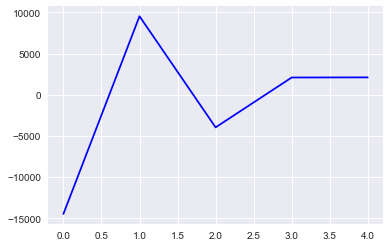

In [111]:
## plotting the forecasted values
plt.plot(forecast_recovered,color='blue')